<a href="https://colab.research.google.com/github/anagiulia-3/TCC/blob/main/TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import das bibliotecas


In [4]:
import sys
!{sys.executable} -m pip install scikit-learn
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [35]:
import pandas as pd

database = pd.read_csv('/content/drive/MyDrive/TCC - database final.csv')
database.head()
database['date'] = pd.to_datetime(database['date'])
database = database.sort_values(by='date').reset_index(drop=True)
database = database.dropna()

display(database)

,date,product,production [ton],plantation [hec],precipitação [mm],temperatura [°C],pH [base h20]
0,2006-09-01,Trigo,1220000.0,886194.0,227.800000,15.166667,5.266667
1,2006-10-01,Trigo,1160000.0,886602.0,87.866667,18.866667,5.266667
2,2006-11-01,Trigo,1135476.0,878722.0,176.100000,20.200000,5.266667
3,2006-12-01,Trigo,1135476.0,878722.0,143.422222,23.388889,5.266667
4,2007-01-01,Trigo,1933188.0,878722.0,236.560000,23.000000,5.266667
...,...,...,...,...,...,...,...
226,2025-07-01,Trigo,2608800.0,832800.0,42.153846,14.893333,5.266667
227,2025-08-01,Trigo,2624600.0,820400.0,61.753846,16.620000,5.266667
228,2025-09-01,Trigo,2678900.0,824900.0,77.742857,19.813333,5.266667
229,2025-10-01,Trigo,2751900.0,818900.0,176.166667,19.492857,5.266667


1. Teste Naive simples

/tmp/ipython-input-761030207.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  produção['prod_lag'] = produção['production [ton]'].shift(1)


MAE Naive: 162434.34061135372
MSE Naive: 97810778356.54149
RMSE Naive: 312747.14763933735
R2 Naive: 0.8061771909324332
Acurácia Naive: 16.59%


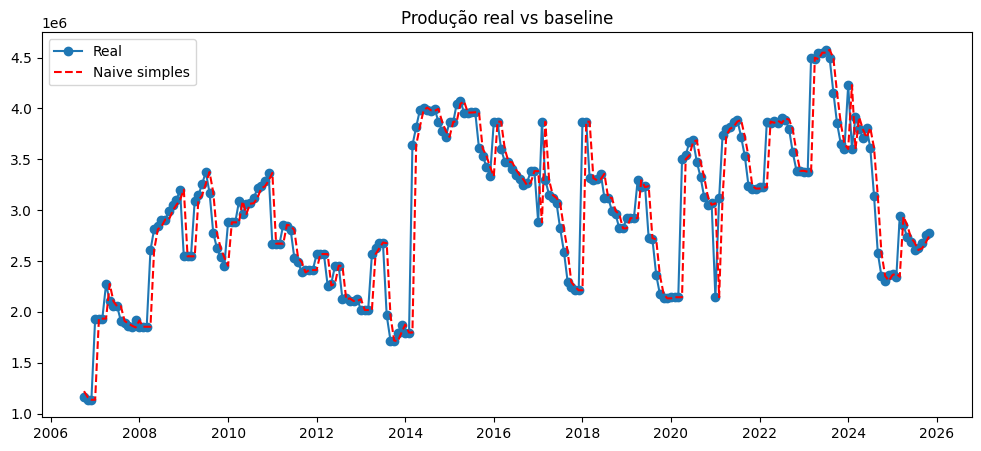

In [34]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#naive simples
produção = database[['date','production [ton]']]
produção['prod_lag'] = produção['production [ton]'].shift(1)
produção = produção.dropna()

#calculo de acuracia e erro
mae_naive = mean_absolute_error(produção["production [ton]"][1:], produção["prod_lag"][1:])
mse_naive = mean_squared_error(produção["production [ton]"][1:], produção["prod_lag"][1:])
rmse_naive = np.sqrt(mse_naive)
y_true = np.array(produção["production [ton]"][1:])
y_pred = np.array(produção["prod_lag"][1:])
r2 = r2_score(y_true, y_pred)
acuracia = accuracy_score(y_true, y_pred)

print(f'MAE Naive: {mae_naive}')
print(f'MSE Naive: {mse_naive}')
print(f'RMSE Naive: {rmse_naive}')
print(f'R2 Naive: {r2}')
print(f'Acurácia Naive: {acuracia * 100:.2f}%')

#visualização
plt.figure(figsize=(12,5))
plt.plot(produção['date'], produção['production [ton]'], label='Real', marker='o')
plt.plot(produção['date'], produção['prod_lag'], label= 'Naive simples', linestyle='--', color='red')
plt.title('Produção real vs baseline')
plt.legend()
plt.show()

1.2- Teste média movel

In [38]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

#testar qual a janela que gera menos erro
df = database[['date','production [ton]']]

erros = {}
for w in range(2, 13): # Testa janelas de 2 a 12
    pred = df['production [ton]'].rolling(window=w).mean().shift(1)
    erro = mean_absolute_error(df['production [ton]'][w:], pred[w:])
    erros[w] = erro

melhor_janela = min(erros, key=erros.get)
print(f"A melhor janela estatística é: {melhor_janela}")

A melhor janela estatística é: 2


/tmp/ipython-input-3353142360.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prod_lag'] = df['production [ton]'].rolling(window=melhor_janela).mean().shift(1)


--- Resultado Baseline (Janela 2) ---
MAE Média Móvel: 214996.4366812227
MSE Média Móvel: 122120250467.91266
RMSE Média Móvel: 349457.0795790417
R2 Média Móvel: 0.758005299748822


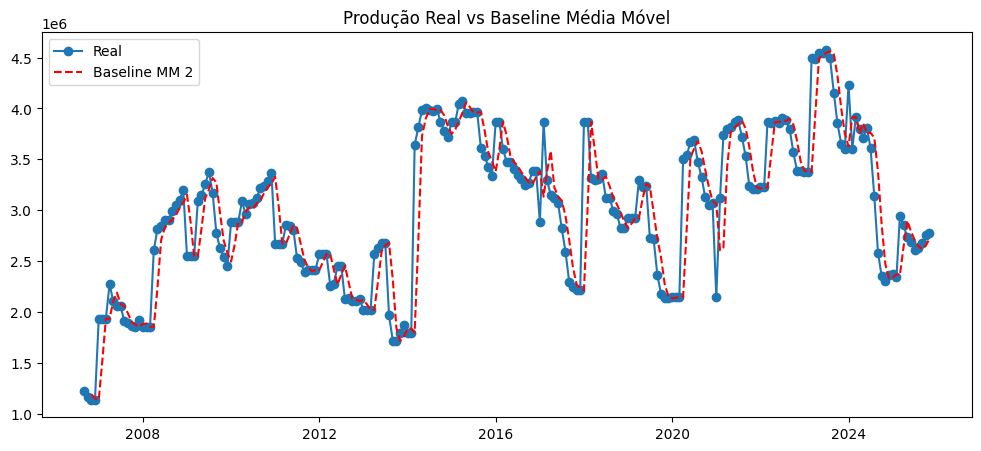

In [46]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
#from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#média movel simples
df['prod_lag'] = df['production [ton]'].rolling(window=melhor_janela).mean().shift(1)
df_teste = df.dropna().copy()
y_true = np.array(df_teste["production [ton]"])
y_pred = np.array(df_teste["prod_lag"])



#testes de erros
mae = mean_absolute_error(y_true, y_pred)
mse_mm = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse_mm)
r2 = r2_score(y_true, y_pred)
#acuracia = accuracy_score(y_true, y_pred) # Removed: accuracy not suitable for regression

print(f"--- Resultado Baseline (Janela {melhor_janela}) ---")
print(f'MAE Média Móvel: {mae}')
print(f'MSE Média Móvel: {mse_mm}')
print(f'RMSE Média Móvel: {rmse}')
print(f'R2 Média Móvel: {r2}')
# print(f'Acurácia Média Móvel: {acuracia * 100:.2f}%') # Removed: accuracy not suitable for regression

# 6. Visualização
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['production [ton]'], label='Real', marker='o')
plt.plot(df['date'], df['prod_lag'], label=f'Baseline MM {melhor_janela}', linestyle='--', color='red')
plt.title('Produção Real vs Baseline Média Móvel')
plt.legend()
plt.show()

1.3 Regressão linear

In [49]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

#dataframe
df = database[['date','production [ton]']]

# 1. ciração dos lags
df['tempo'] = np.arange(len(df))
df['lag_1'] = df['production [ton]'].shift(1)
df['lag_2'] = df['production [ton]'].shift(2)
df_model = df.dropna().copy()



train = df_model.iloc[:-8]
test = df_model.iloc[-8:]

X_train = train[['tempo', 'lag_1', 'lag_2']]
y_train = train['production [ton]']

X_test = test[['tempo', 'lag_1', 'lag_2']]
y_test = test['production [ton]']

# 4. Treinamento
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# 5. Previsões
previsoes = modelo.predict(X_test)

# 6. Cálculo das Métricas de Erro
mae = mean_absolute_error(y_test, previsoes)
r2 = r2_score(y_test, previsoes)

# Calculando a "Acurácia" baseada no erro percentual (MAPE)
mape = mean_absolute_percentage_error(y_test, previsoes)
acuracia = (1 - mape) * 100

print(f"--- Relatório de Performance do Modelo ---")
print(f"R² (Coeficiente de Determinação): {r2:.4f}")
print(f"MAE (Erro Médio Absoluto): {mae:.2f} unidades")
print(f"MAPE (Erro Percentual Médio): {mape:.2%}")
print(f"ACURÁCIA DO MODELO: {acuracia:.2f}%")

# 7. Comparação visual rápida
print("\nReal vs Previsto:")
comparacao = pd.DataFrame({'Real': y_test, 'Previsto': previsoes.round(2)})
print(comparacao)

--- Relatório de Performance do Modelo ---
R² (Coeficiente de Determinação): -3.1962
MAE (Erro Médio Absoluto): 144471.18 unidades
MAPE (Erro Percentual Médio): 5.32%
ACURÁCIA DO MODELO: 94.68%

Real vs Previsto:
          Real    Previsto
223  2853700.0  3068205.78
224  2732000.0  2949443.07
225  2683300.0  2843241.16
226  2608800.0  2807275.20
227  2624600.0  2742311.63
228  2678900.0  2762790.55
229  2751900.0  2812620.62
230  2774000.0  2877081.46


/tmp/ipython-input-4139999278.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tempo'] = np.arange(len(df))  # Tendência temporal
/tmp/ipython-input-4139999278.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_1'] = df['production [ton]'].shift(1)
/tmp/ipython-input-4139999278.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata